In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np 

In [24]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing 
from sklearn.metrics import classification_report  

In [25]:
df = pd.read_csv('bank-full.csv', sep=';') 

In [26]:
df 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [27]:
df.shape
 

(45211, 17)

In [7]:
# Encoding categrical variables 

In [28]:
df1=pd.get_dummies(df,columns=['job','marital','education','contact','poutcome','month'])
df1  

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
df1.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [30]:
df1.describe()  

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.114375,0.215257,0.032890,...,0.004733,0.058592,0.031032,0.152507,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.318269,0.411005,0.178351,...,0.068637,0.234862,0.173407,0.359516,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# Custom Binary Encoding of Binary o/p variables 
df1['default'] = np.where(df1['default'].str.contains("yes"), 1, 0)
df1['housing'] = np.where(df1['housing'].str.contains("yes"), 1, 0)
df1['loan'] = np.where(df1['loan'].str.contains("yes"), 1, 0)
df1['y'] = np.where(df1['y'].str.contains("yes"), 1, 0)  
df1   

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


# Model building

In [32]:
from sklearn.linear_model import LogisticRegression
df1.shape

import warnings
warnings.filterwarnings('ignore')   

In [33]:
# Dividing our data into input and output variables
x=pd.concat([df1.iloc[:,0:10],df1.iloc[:,11:]],axis=1)
y=df1.iloc[:,10]  

In [34]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(x,y) 

LogisticRegression()

# Model predictions

In [39]:
# Predict for x dataset
y1=classifier.predict(x)
y1 


array([0, 0, 0, ..., 1, 0, 0])

In [41]:
y_df=pd.DataFrame({'actual_value':y,'pred_value':y1})
y_df   

,actual_value,pred_value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


# Testing Model Accuracy

In [42]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y1)
print(confusion_matrix)

[[39106   816]
 [ 4086  1203]]


In [43]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y,y1)
print(accuracy_score)

0.8915750591670168


In [44]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y1))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.23      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.64     45211
weighted avg       0.87      0.89      0.87     45211



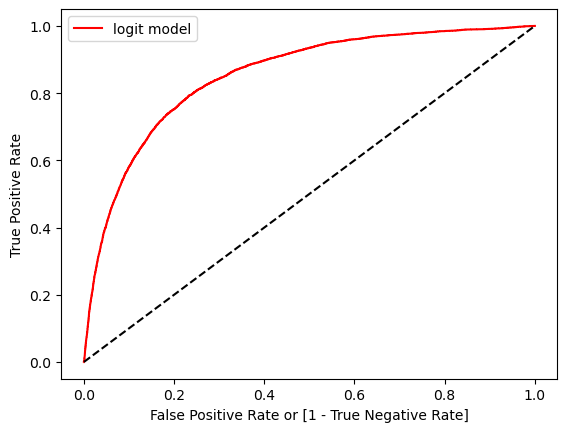

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y,classifier.predict_proba(x)[:,1])

auc = roc_auc_score(y,y1)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [46]:
y_prob1 = pd.DataFrame(classifier.predict_proba(x)[:,1]) 

In [47]:
y_prob1 

,0
0,0.034705
1,0.021553
2,0.017515
3,0.017440
4,0.094781
...,...
45206,0.594162
45207,0.185423
45208,0.653937
45209,0.066475


In [48]:
import statsmodels.api as sm  

In [49]:
logit = sm.Logit(y, x)   

In [50]:

logit.fit().summary()  

         Current function value: 0.238463
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45168
Method:                           MLE   Df Model:                           42
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                  0.3392
Time:                        21:18:51   Log-Likelihood:                -10781.
converged:                      False   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     0.0001      0.002      0.051      0.959      -0.004       0.004
default                -0.0167      0.163     -0.102      0.918      -0.336       0.302
balance              1.284e-05   5.15e-06      2.493      0.013    2.75e-06    2.29e-05
housing                -0.6754      0.044    -15.395      0.000      -0.761      -0.589
loan                   -0.4254      0.060     -7.091      0.000      -0.543      -0.308
day                     0.0100      0.002      3.993      0.000       0.005       0.015
duration                0.0042   6.45e-05     64.985      0.000       0.004       0.004
campaign               -0.0908      0.010     -8.955      0.000      -0.111      -0.071
pdays                  -0.0001      0.000     -0.335      0.737      -0.001       0.000
previous                0.0102      0.007      1.561      0.118      -0.003       0.023
job_admin.              0.0019   1.19e+06   1.57e-09      1.000   -2.32e+06    2.32e+06
job_blue-collar        -0.3080   1.24e+06  -2.48e-07      1.000   -2.44e+06    2.44e+06
job_entrepreneur       -0.3552   1.24e+06  -2.86e-07      1.000   -2.43e+06    2.43e+06
job_housemaid          -0.5021   1.18e+06  -4.24e-07      1.000   -2.32e+06    2.32e+06
job_management         -0.1634   1.36e+06   -1.2e-07      1.000   -2.67e+06    2.67e+06
job_retired             0.2542   1.32e+06   1.93e-07      1.000   -2.58e+06    2.58e+06
job_self-employed      -0.2965   1.35e+06   -2.2e-07      1.000   -2.65e+06    2.65e+06
job_services           -0.2219   1.28e+06  -1.73e-07      1.000   -2.51e+06    2.51e+06
job_student             0.3840   1.16e+06   3.31e-07      1.000   -2.27e+06    2.27e+06
job_technician         -0.1742   1.34e+06   -1.3e-07      1.000   -2.63e+06    2.63e+06
job_unemployed         -0.1749   1.22e+06  -1.43e-07      1.000    -2.4e+06     2.4e+06
job_unknown            -0.3114   1.27e+06  -2.45e-07      1.000   -2.49e+06    2.49e+06
marital_divorced       -0.5935   1.09e+06  -5.42e-07      1.000   -2.15e+06    2.15e+06
marital_married        -0.7730   1.09e+06  -7.09e-07      1.000   -2.14e+06    2.14e+06
marital_single         -0.5010   1.08e+06  -4.63e-07      1.000   -2.12e+06    2.12e+06
education_primary      -0.6701        nan        nan        nan         nan         nan
education_secondary    -0.4866        nan        nan        nan         nan         nan
education_tertiary     -0.2912        nan        nan        nan         nan         nan
education_unknown      -0.4196        nan        nan        nan         nan         nan
contact_cellular       -0.0270   3.93e+05  -6.86e-08      1.000    -7.7e+05     7.7e+05
contact_telephone      -0.1904   3.83e+05  -4.98e-07      1.000    -7.5e+05     7.5e+05
contact_unknown        -1.6502   3.87e+05  -4.26e-06      1.000   -7.58e+05    7.58e+05
poutcome_failure       -1.0676        nan        nan        nan         nan         nan
poutcome_other         -0.8641        nan        nan        nan         n

In [51]:
fpr

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.98146385e-01, 9.98146385e-01, 1.00000000e+00])

In [52]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [56]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(classifier.predict_proba(x)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls  

,thresholds,accuracy
1074,4.705316e-01,0.892283
1078,4.693717e-01,0.892283
1073,4.707696e-01,0.892261
1075,4.704997e-01,0.892261
1077,4.695049e-01,0.892261
...,...,...
7124,1.563803e-05,0.122094
7125,1.562700e-05,0.122072
7126,5.010598e-07,0.118622
7127,4.964652e-07,0.118599


In [54]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh)) 

Best Threshold=0.116470


In [55]:
threshold = 0.116470
preds = np.where(classifier.predict_proba(x)[:,1] > threshold, 1, 0)
print(classification_report(y,preds)) 

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     39922
           1       0.31      0.79      0.45      5289

    accuracy                           0.77     45211
   macro avg       0.64      0.78      0.65     45211
weighted avg       0.89      0.77      0.81     45211

